In [88]:
#import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8) #adjusts the configuration of the figures we create

#read in data

df=pd.read_csv("Downloads/movies.csv")


In [5]:
#lets look at the data

df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [6]:
# In this project, we are going to identify which fields are more correlated with the gross revenue column

In [8]:
#Checking for missing data

for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print("{}-{}%".format(col,pct_missing))
    

name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


In [60]:
for col in df.columns:
    missing_values = df[col].isnull().sum()
    print("{} - {} missing values".format(col, missing_values))


name - 85 missing values
rating - 0 missing values
genre - 0 missing values
year - 0 missing values
released - 0 missing values
score - 0 missing values
votes - 0 missing values
director - 0 missing values
writer - 0 missing values
star - 0 missing values
country - 0 missing values
budget - 0 missing values
gross - 0 missing values
company - 0 missing values
runtime - 0 missing values
corrected_year - 0 missing values


In [61]:
#dropping all the missing values for higher accuracy:
df=df.dropna()


In [29]:
#Data type for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [32]:
#changing datatype of columns:

df["budget"]=df["budget"].astype('int64')
df["votes"]=df["votes"].astype("int64")
df["gross"]=df["gross"].astype("int64")

In [99]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


In [44]:
#new column to match both released and year

df["corrected_year"]=df["released"].str.extract(r'(\d{4})', expand=False)

In [100]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


In [51]:
#df.sort_values(by=["gross"], inplace=False, ascending=False)

In [47]:
pd.set_option("display.max_rows", None)

In [101]:
df=df.sort_values("gross", inplace=False, ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


In [54]:
# Drop the duplicates:

df["name"]=df["name"].drop_duplicates()

In [58]:
df.shape

(5421, 16)

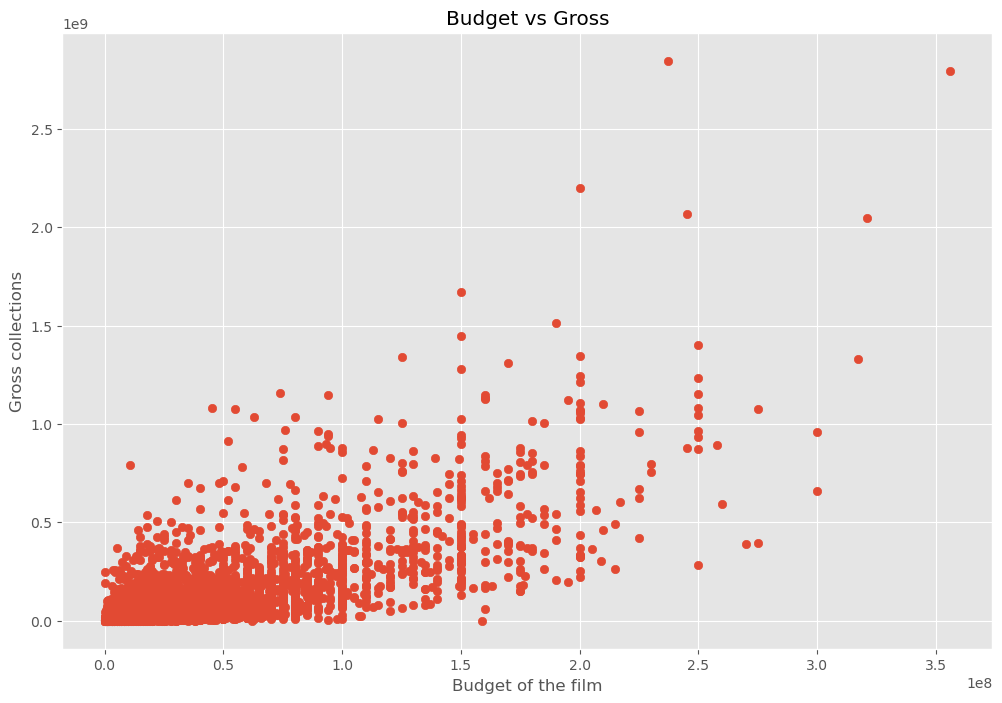

In [68]:
#scattter plot with budget vs gross for finding out correlation

plt.scatter(x=df["budget"], y=df["gross"])
plt.title("Budget vs Gross")
plt.xlabel("Budget of the film")
plt.ylabel("Gross collections")
plt.show()

Text(0.5, 1.0, 'Budget vs gross')

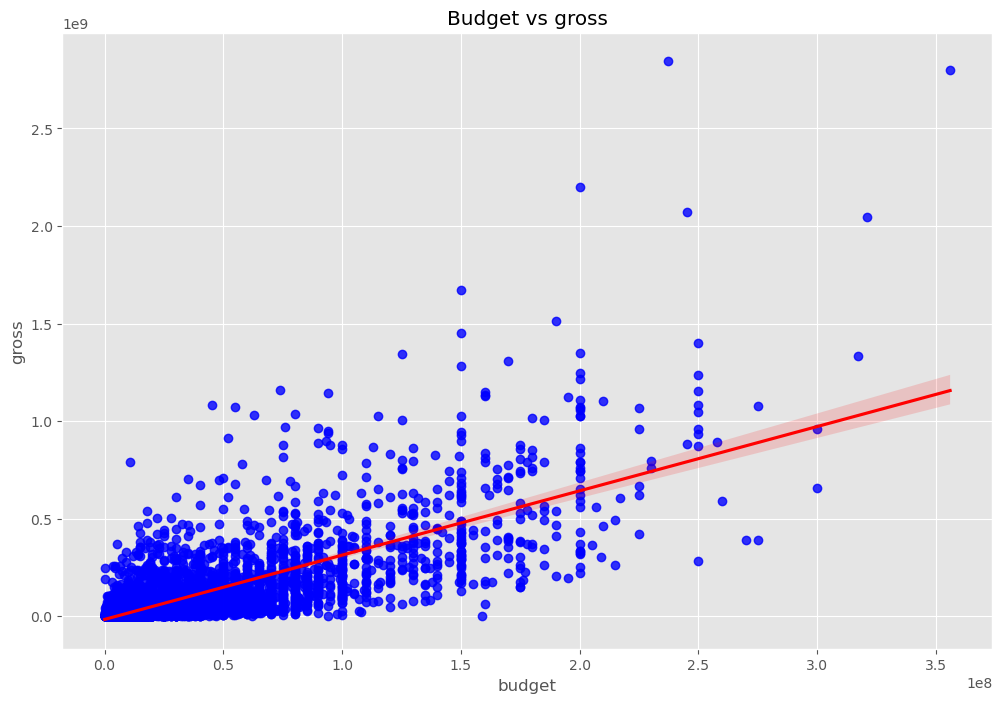

In [70]:
#plotting budget vs gross using seaborn:

sns.regplot(x="budget", y="gross", data=df, scatter_kws={"color":"blue"}, line_kws={"color":"red"})
plt.title("Budget vs gross")

In [73]:
#looking for correlation values

df.corr(method="pearson")

/var/folders/2t/rj5y7_0s0bs8bc665f93vwnh0000gn/T/ipykernel_9682/3019904929.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method="pearson")


,year,score,votes,budget,gross,runtime
year,1.000000,0.061236,0.207542,0.326118,0.271863,0.075414
score,0.061236,1.000000,0.473250,0.071325,0.222235,0.413459
votes,0.207542,0.473250,1.000000,0.438567,0.618162,0.348798
budget,0.326118,0.071325,0.438567,1.000000,0.737723,0.317912
gross,0.271863,0.222235,0.618162,0.737723,1.000000,0.276189
runtime,0.075414,0.413459,0.348798,0.317912,0.276189,1.000000


In [74]:
df.corr(method="kendall")

/var/folders/2t/rj5y7_0s0bs8bc665f93vwnh0000gn/T/ipykernel_9682/3437029024.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method="kendall")


,year,score,votes,budget,gross,runtime
year,1.000000,0.043559,0.297057,0.219924,0.236888,0.063869
score,0.043559,1.000000,0.351834,-0.006354,0.125515,0.292593
votes,0.297057,0.351834,1.000000,0.343511,0.552170,0.203603
budget,0.219924,-0.006354,0.343511,1.000000,0.510966,0.230472
gross,0.236888,0.125515,0.552170,0.510966,1.000000,0.175733
runtime,0.063869,0.292593,0.203603,0.230472,0.175733,1.000000


In [76]:
df.corr(method="spearman")

/var/folders/2t/rj5y7_0s0bs8bc665f93vwnh0000gn/T/ipykernel_9682/3994303778.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method="spearman")


,year,score,votes,budget,gross,runtime
year,1.000000,0.063886,0.428513,0.311431,0.347360,0.094001
score,0.063886,1.000000,0.497749,-0.009939,0.183929,0.412527
votes,0.428513,0.497749,1.000000,0.490004,0.744107,0.298244
budget,0.311431,-0.009939,0.490004,1.000000,0.691835,0.329320
gross,0.347360,0.183929,0.744107,0.691835,1.000000,0.255490
runtime,0.094001,0.412527,0.298244,0.329320,0.255490,1.000000


In [77]:
# High correlation between budget and gross

/var/folders/2t/rj5y7_0s0bs8bc665f93vwnh0000gn/T/ipykernel_9682/3949336269.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df.corr(method="pearson")


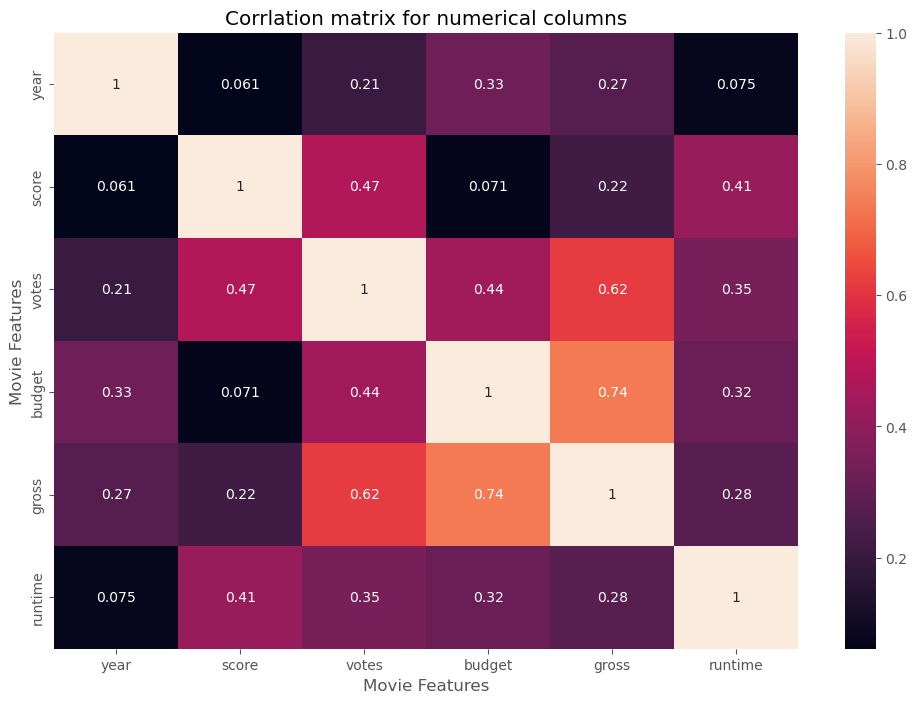

In [82]:
correlation_matrix=df.corr(method="pearson")

sns.heatmap(correlation_matrix, annot=True)

plt.title("Corrlation matrix for numerical columns")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [83]:
# to look at company and gross correlation

# company column is converted into numeric data for correlation purpose

In [102]:
df_numeric= df

for col in df_numeric.columns:
    if (df_numeric[col].dtype== 'object'):
        df_numeric[col]=df_numeric[col].astype("category")
        df_numeric[col]=df_numeric[col].cat.codes
df_numeric.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0


In [98]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


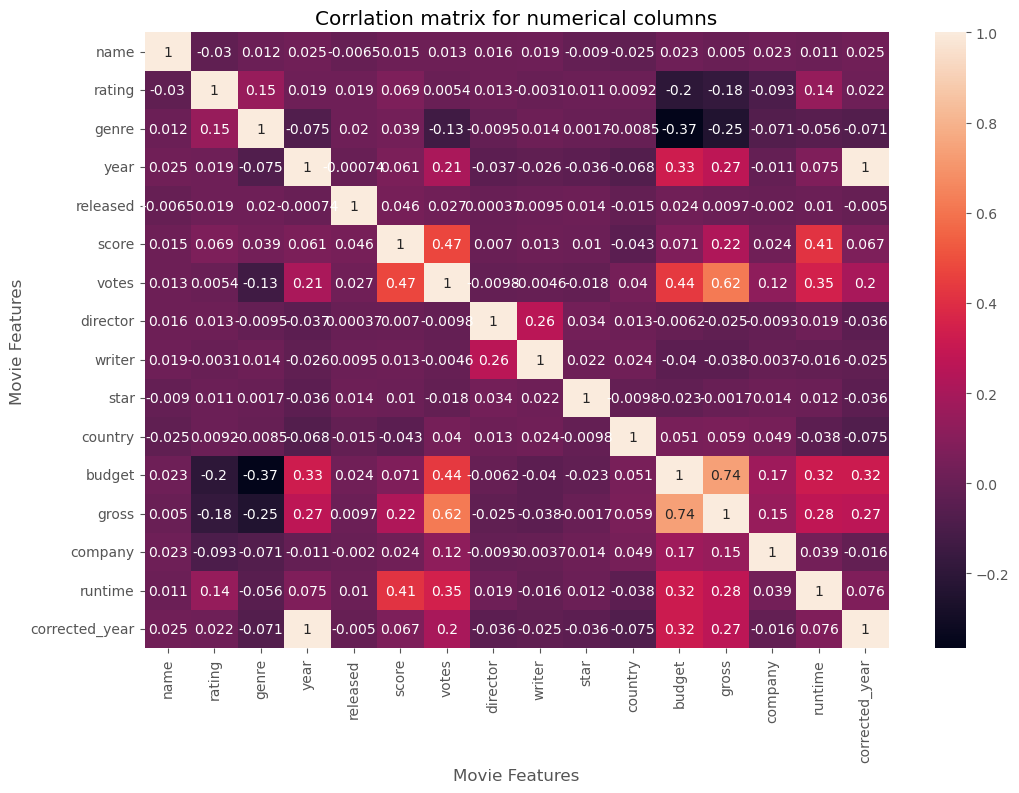

In [91]:
correlation_matrix=df_numeric.corr(method="pearson")

sns.heatmap(correlation_matrix, annot=True)

plt.title("Corrlation matrix for numerical columns")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [92]:
df_numeric.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,corrected_year
name,1.000000,-0.029775,0.011915,0.025221,-0.006524,0.014977,0.012862,0.016134,0.018693,-0.009025,-0.025491,0.023097,0.004959,0.023055,0.010925,0.025243
rating,-0.029775,1.000000,0.148543,0.018993,0.018745,0.068714,0.005407,0.012756,-0.003142,0.010559,0.009236,-0.202192,-0.178963,-0.093193,0.144582,0.021540
genre,0.011915,0.148543,1.000000,-0.075050,0.020174,0.039223,-0.134223,-0.009479,0.013931,0.001744,-0.008524,-0.366326,-0.246023,-0.070841,-0.055838,-0.070898
year,0.025221,0.018993,-0.075050,1.000000,-0.000740,0.061236,0.207542,-0.036977,-0.025805,-0.035542,-0.068017,0.326118,0.271863,-0.011337,0.075414,0.998707
released,-0.006524,0.018745,0.020174,-0.000740,1.000000,0.045525,0.027054,0.000370,0.009538,0.014112,-0.014850,0.024285,0.009682,-0.002003,0.009972,-0.005048
score,0.014977,0.068714,0.039223,0.061236,0.045525,1.000000,0.473250,0.007000,0.013292,0.010328,-0.043140,0.071325,0.222235,0.024070,0.413459,0.066723
votes,0.012862,0.005407,-0.134223,0.207542,0.027054,0.473250,1.000000,-0.009761,-0.004604,-0.018431,0.040218,0.438567,0.618162,0.122424,0.348798,0.204546
director,0.016134,0.012756,-0.009479,-0.036977,0.000370,0.007000,-0.009761,1.000000,0.263424,0.034178,0.013129,-0.006229,-0.025160,-0.009265,0.019221,-0.036030
writer,0.018693,-0.003142,0.013931,-0.025805,0.009538,0.013292,-0.004604,0.263424,1.000000,0.022187,0.024470,-0.040011,-0.037735,-0.003672,-0.016465,-0.025351
star,-0.009025,0.010559,0.001744,-0.035542,0.014112,0.010328,-0.018431,0.034178,0.022187,1.000000,-0.009764,-0.022859,-0.001711,0.014075,0.011889,-0.035985


In [93]:
corr_matrix=df_numeric.corr()
corr_paris=corr_matrix.unstack()
corr_paris

name            name              1.000000
                rating           -0.029775
                genre             0.011915
                year              0.025221
                released         -0.006524
                score             0.014977
                votes             0.012862
                director          0.016134
                writer            0.018693
                star             -0.009025
                country          -0.025491
                budget            0.023097
                gross             0.004959
                company           0.023055
                runtime           0.010925
                corrected_year    0.025243
rating          name             -0.029775
                rating            1.000000
                genre             0.148543
                year              0.018993
                released          0.018745
                score             0.068714
                votes             0.005407
           

In [95]:
sort_val= corr_paris.sort_values()
sort_val

genre           budget           -0.366326
budget          genre            -0.366326
genre           gross            -0.246023
gross           genre            -0.246023
rating          budget           -0.202192
budget          rating           -0.202192
gross           rating           -0.178963
rating          gross            -0.178963
votes           genre            -0.134223
genre           votes            -0.134223
company         rating           -0.093193
rating          company          -0.093193
genre           year             -0.075050
year            genre            -0.075050
corrected_year  country          -0.074832
country         corrected_year   -0.074832
corrected_year  genre            -0.070898
genre           corrected_year   -0.070898
                company          -0.070841
company         genre            -0.070841
year            country          -0.068017
country         year             -0.068017
runtime         genre            -0.055838
genre      

In [97]:
high_corr= sort_val[(sort_val) > 0.5]
high_corr

votes           gross             0.618162
gross           votes             0.618162
                budget            0.737723
budget          gross             0.737723
year            corrected_year    0.998707
corrected_year  year              0.998707
name            name              1.000000
company         company           1.000000
gross           gross             1.000000
budget          budget            1.000000
country         country           1.000000
star            star              1.000000
writer          writer            1.000000
director        director          1.000000
votes           votes             1.000000
score           score             1.000000
released        released          1.000000
year            year              1.000000
genre           genre             1.000000
rating          rating            1.000000
runtime         runtime           1.000000
corrected_year  corrected_year    1.000000
dtype: float64

In [103]:
#votes and budget has highest correlation with respect to gross collection